# Assignment 4
## Anton Franzluebbers

Imports:

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
data = sns.load_dataset("titanic")

## Part 1: Missing Data Exploration

In [7]:
display(data)

survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive  alone  
0      man        True  NaN  Southampton    no  False  
1    woman       False    C    Cherbourg   yes  False  
2    woman       False  NaN  Southampton   yes   True  
3    woman       False    C  Southampton   yes  False  
4      man        True  NaN  Southampton    no   True  
..     ...         ...  ...          ...   ...    ...  
886    man        True  NaN  Southampton    no   True  
887  woman       False    B  Southampton   yes   True  
888  woman       False  NaN  Southampton    no  False  
889    man        True    C    Cherbourg   yes   True  
890    man        True  NaN   Queenstown    no   True  

[891 rows x 15 columns]

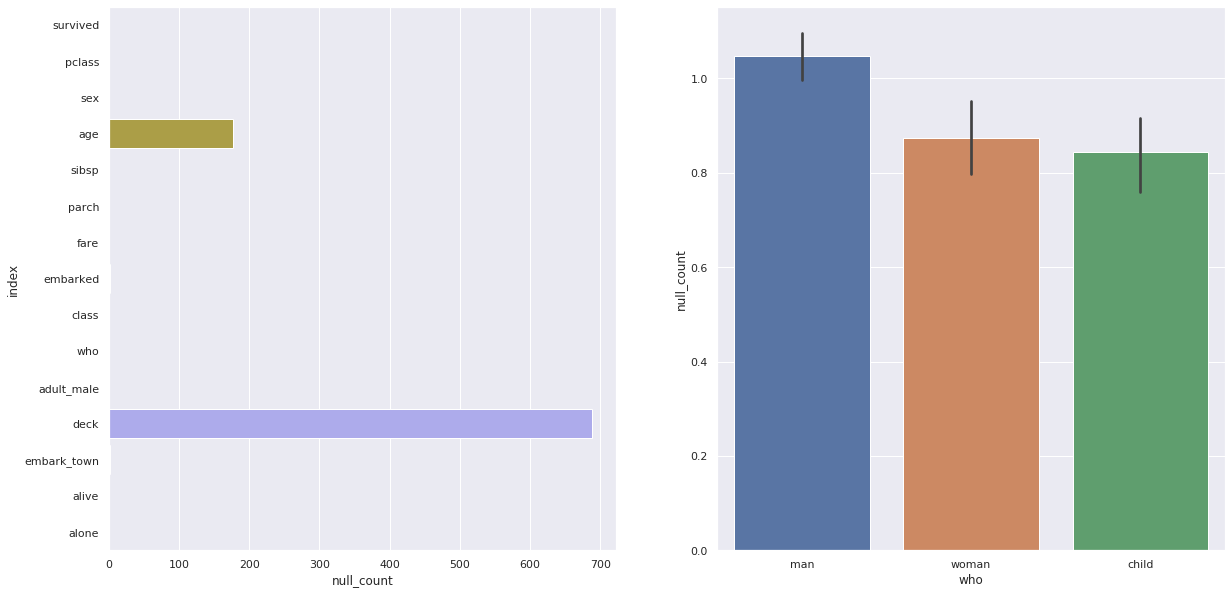

In [8]:
fig, ax = plt.subplots(1,2,figsize=(20,10))

# Part 1

# create a table of counts of null values per variable
nulls = pd.DataFrame(data.isnull().sum(), columns=['null_count'])
# make the column name list an actual column
nulls = nulls.reset_index()
# plot
sns.barplot(data=nulls,x="null_count", y="index", ax=ax[0])




# Part 2

# find nulls per person
nulls = pd.DataFrame(data.isnull().sum(axis=1), columns=['null_count'])
# add the main data back in
nulls = pd.merge(nulls, data, left_index=True, right_index=True)
# plot 
sns.barplot(data=nulls,x="who", y="null_count", ax=ax[1])

plt.show()

## Part 2: Survival Exploration

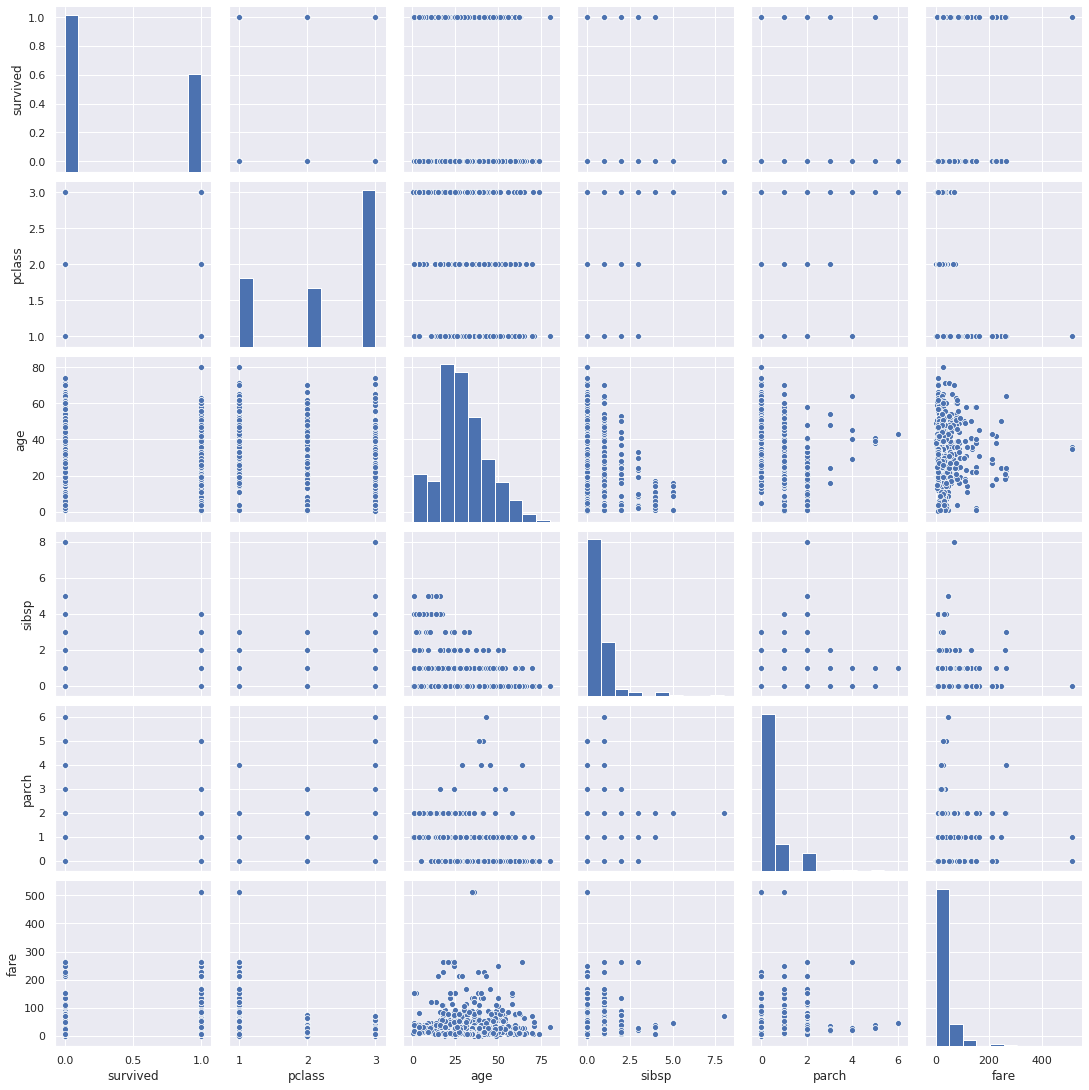

In [9]:
sns.pairplot(data[["survived", "pclass", "age", "sibsp", "parch", "fare"]], dropna=True)

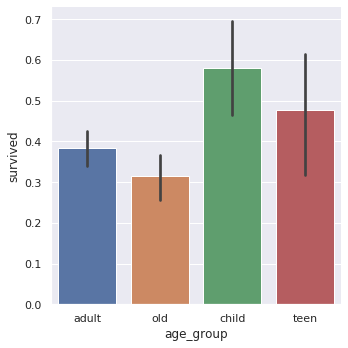

In [10]:
# define the age groups
def age_group(row):
    if (row['age'] < 13):
        return 'child'
    if row['age'] < 18:
        return 'teen'
    if row['age'] < 50:
        return 'adult'
    return 'old'

# apply the grouping of ages
data['age_group'] = data.apply(lambda row: age_group(row), axis=1)

#plot
sns.catplot(data=data, x="age_group", y="survived", kind="bar")

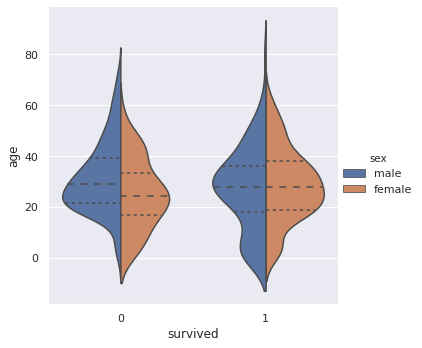

In [11]:
# plot age distribution vs survival split by sex
sns.catplot(data=data, x='survived', y='age', hue="sex", split=True, inner="quart", kind='violin')

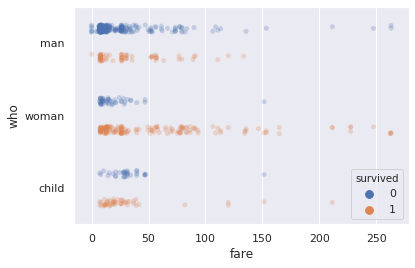

In [12]:
# ignore NAs in age
data = data.dropna(subset=["age"])

# ignore fares greater than 300 to zoom in on graph
data = data.loc[data.fare < 300]

# plot
sns.stripplot(data=data, x="fare", y="who", hue="survived", alpha=.25, dodge=True)